MINIST Handwritten Digit Classification using Deep Learning

## Importing the dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(12)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
from sklearn.model_selection import train_test_split

## Loading the QMNIST data from keras.datasets

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data();

In [ ]:
import pickle

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Replace '/path/to/MNIST-120k' with the actual path to your QMNIST file
qmnist_file_path = '/content/MNIST-120k'

try:
    qmnist_data = unpickle(qmnist_file_path)

    print("QMNIST dataset loaded successfully.")
    # You can inspect the keys in the dictionary to see the data structure
    print("Keys in the QMNIST dictionary:", qmnist_data.keys())

except FileNotFoundError:
    print(f"Error: The file '{qmnist_file_path}' was not found.")
    print("Please upload the MNIST-120k or provide the correct path.")
except Exception as e:
    print(f"An error occurred while loading the QMNIST dataset: {e}")

QMNIST dataset loaded successfully.
Keys in the QMNIST dictionary: dict_keys(['data', 'labels'])


In [ ]:
if 'data' in qmnist_data and 'labels' in qmnist_data:
    # Extract data and labels
    all_data = qmnist_data['data']
    all_labels = qmnist_data['labels']

    X_train, X_test, Y_train, Y_test = train_test_split(all_data, all_labels, test_size=0.2, random_state=42)
    print("QMNIST data split into training and testing sets using train_test_split.")
    print("X_train shape:", X_train.shape)
    print("Y_train shape:", Y_train.shape)
    print("X_test shape:", X_test.shape)
    print("Y_test shape:", Y_test.shape)

    # Reshape labels to be consistent with MNIST labels
    Y_train = Y_train.flatten()
    Y_test = Y_test.flatten()


else:
    print("Error: 'data' or 'labels' key not found in the QMNIST dictionary.")
    print("Please check the structure of your QMNIST data.")

QMNIST data split into training and testing sets using train_test_split.
X_train shape: (96000, 28, 28)
Y_train shape: (96000, 1)
X_test shape: (24000, 28, 28)
Y_test shape: (24000, 1)


In [ ]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape) # image size of 28*28, y_train has the lable (answer 0-9) for each image

(96000, 28, 28) (96000,) (24000, 28, 28) (24000,)


- Training Data = 60,000 images
- Test Data = 10,000 images
- (grayscale image)

(28, 28)
9


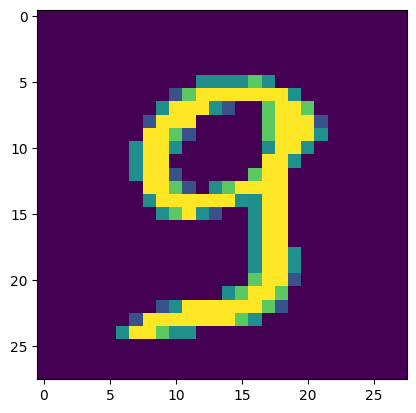

In [ ]:
print(X_train[10].shape)
print(Y_train[10])
plt.imshow(X_train[10])
plt.show()

In [ ]:
# The labels for y_train/test
print(np.unique(Y_train), np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9] [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Scaling the values in from [0,255] to [0,1] (normalize)
X_train = X_train/255
X_test = X_test/255
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## Building the Neural Network

In [ ]:
# Setting up the layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)), # Corrected Flatten layer
    keras.layers.Dense(128, activation = 'relu'), # 128 neurons
    keras.layers.Dense(64, activation = 'relu'),  # 64 neurons
    keras.layers.Dense(10, activation = 'softmax') # Output layer for 10 classes, Softmax for multiclass
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compiling the Neural Network
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# Training the Neural Network
model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9002 - loss: 0.3394
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9708 - loss: 0.0959
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9801 - loss: 0.0651
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.9853 - loss: 0.0475
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9877 - loss: 0.0384
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9895 - loss: 0.0317
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9910 - loss: 0.0263
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9918 - loss: 0.0230
Epoch 9/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9930 - loss: 0.0210
Epoch 10/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9931 - loss: 0.0198


## Accuray on Test Data

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9770 - loss: 0.1230
0.9777500033378601


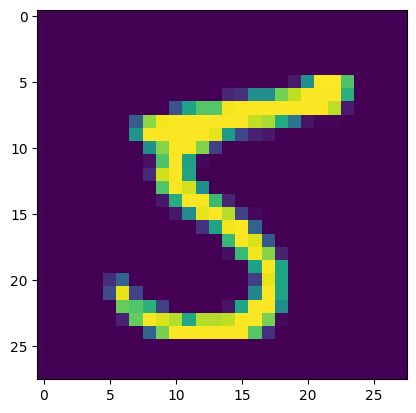

In [ ]:
plt.imshow(X_test[10])
plt.show()

In [ ]:
print(Y_test[10])

5


In [ ]:
y_pred = model.predict(X_test)
print(y_pred.shape)
print(y_pred[10]) # Probability of each labels

750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
(24000, 10)
[7.1058152e-32 2.4988024e-26 1.0312508e-31 1.3498934e-23 0.0000000e+00
 9.9999994e-01 5.3584879e-27 3.0796863e-31 2.5335619e-23 8.0778852e-23]


In [ ]:
# Converting the prediction probabilities to class label
label_for_9th_test_image = np.argmax(y_pred[10])
print(label_for_9th_test_image)

5


In [ ]:
# Coverting the prediction probabilities to class lable for all test datapoints
Y_pred_labels = [np.argmax(i) for i in y_pred]
print(Y_pred_labels)

[np.int64(0), np.int64(4), np.int64(7), np.int64(8), np.int64(8), np.int64(6), np.int64(2), np.int64(6), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(2), np.int64(1), np.int64(8), np.int64(4), np.int64(5), np.int64(6), np.int64(2), np.int64(9), np.int64(7), np.int64(1), np.int64(8), np.int64(7), np.int64(2), np.int64(5), np.int64(1), np.int64(4), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(8), np.int64(7), np.int64(8), np.int64(0), np.int64(0), np.int64(8), np.int64(7), np.int64(7), np.int64(1), np.int64(7), np.int64(5), np.int64(1), np.int64(6), np.int64(1), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(7), np.int64(7), np.int64(2), np.int64(4), np.int64(8), np.int64(3), np.int64(4), np.int64(1), np.int64(6), np.int64(9), np.int64(3), np.int64(7), np.int64(6), np.int64(9), np.int64(7), np.int64(8), np.int64(0), np.int64(4), np.int64(3), np.int64(5), np.int64(7), np.int64(0), np.int64(9), np.int64(5), np.int64(0), np.int64(3), np.int64(0)

- Y_test -> True labels
- Y_pred_labels -> Predicted labels

## Confusion Matrix

In [ ]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

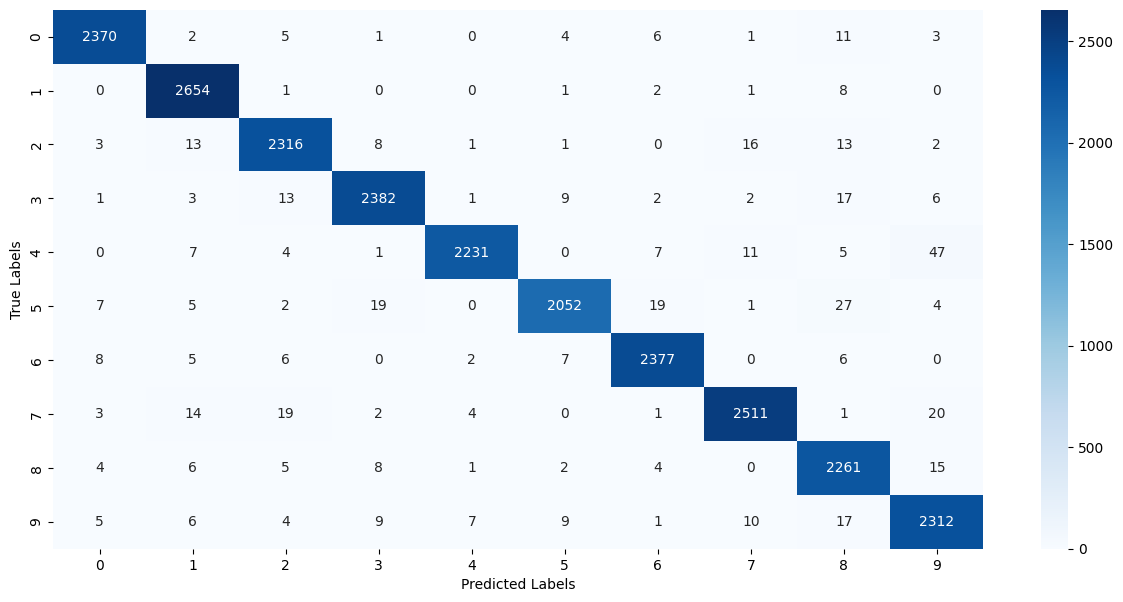

In [ ]:
plt.figure(figsize = (15,7))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
recall = np.diag(conf_mat) / np.sum(conf_mat, axis = 1)
precision = np.diag(conf_mat) / np.sum(conf_mat, axis = 0)
plt.show()

In [ ]:
input_image_path = '/content/img.jpg'
input_image = cv2.imread(input_image_path)

In [ ]:
print(type(input_image))
print(input_image.shape)

<class 'numpy.ndarray'>
(143, 133, 3)


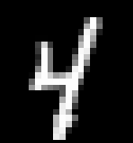

In [ ]:
cv2_imshow(input_image)

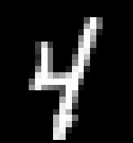

In [ ]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayscale)

In [ ]:
imput_image_resize = cv2.resize(grayscale, (28,28))
cv2_imshow(imput_image_resize)

In [ ]:
imput_image_resize = imput_image_resize/255
image_reshaped = np.reshape(imput_image_resize, [1,28,28])

In [ ]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
[[3.2354965e-16 6.7580285e-17 1.7216701e-19 2.3183805e-17 1.0000000e+00
  5.9623362e-13 1.3768699e-15 9.0163527e-14 1.6979899e-16 2.2973784e-10]]
4


## Predictive System

Path of the image to be predicted/content/img1.jpg


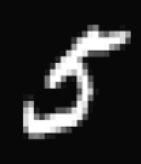

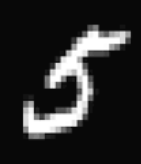

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
The handwritten digit is recognized as  5


In [ ]:
input_image_path = input('Path of the image to be predicted')
input_image = cv2.imread(input_image_path)

if input_image is None:
    print(f"Error: Could not load image from {input_image_path}")
else:
    cv2_imshow(input_image)

    grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    if np.mean(grayscale) > 128: # Assuming light background
        grayscale = 255 - grayscale
        print("Inverting image colors.")

    cv2_imshow(grayscale)
    imput_image_resize = cv2.resize(grayscale, (28,28))
    imput_image_resize = imput_image_resize/255.0 # Use 255.0 for float division
    image_reshaped = np.reshape(imput_image_resize, [1,28,28])

    input_prediction = model.predict(image_reshaped)
    input_pred_label = np.argmax(input_prediction)

    print('The handwritten digit is recognized as ', input_pred_label)